## Network Flow

In [2]:
import numpy as np

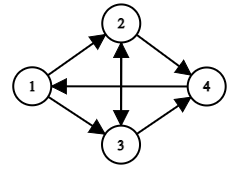

$m = |N|, n = |A|$

In [23]:
def build_matrix(number_node: int, edges: tuple[int, int]):
    # Output: matrix mx(n+1) A, with component i=1, j=-1, and last component 1
    number_edge = len(edges)
    A = np.zeros((number_node, number_edge + 1))
    for i, edge in enumerate(edges):
        A[edge[0] - 1, i] = 1
        A[edge[1] - 1, i] = -1
    A[-1, -1] = 1
    return A


In [26]:
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 2), (3, 4), (4, 1)], # (4, inf)
number_node = 4
A = build_matrix(number_node, edges)
A


array([[ 1.,  1.,  0.,  0.,  0.,  0., -1.,  0.],
       [-1.,  0.,  1.,  1., -1.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0., -1.,  1.,  1.]])

In [27]:
B = [0, 2, 5, -1]
A[:, B]

array([[ 1.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])